In [1]:
import csv

# Specify the path to your CSV file
csv_file_path = 'D:\College_life\ECE 143\VSRR_Provisional_Drug_Overdose_Death_Counts.csv'

data_list = []

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)


    # Iterate through the rows and append each row to the data_list
    for row in csv_reader:
        data_list.append(row)

In [2]:
data_list[0]

['锘縎tate',
 'Year',
 'Month',
 'Period',
 'Indicator',
 'Data Value',
 'Percent Complete',
 'Percent Pending Investigation',
 'State Name',
 'Footnote',
 'Footnote Symbol',
 'Predicted Value']

In [3]:
data_list[5850]

['CA',
 '2020',
 'September',
 '12 month-ending',
 'Synthetic opioids, excl. methadone (T40.4)',
 '3,587',
 '100',
 '0.311160096',
 'California',
 'Numbers may differ from published reports using final data. See Technical Notes.',
 '**',
 '3,726']

In [4]:
# Find the indices of 'State' and 'Indicator' columns
State_index = data_list[0].index('锘縎tate')
Indicator_index = data_list[0].index('Indicator')
Year_index = data_list[0].index('Year')
Data_index = data_list[0].index('Data Value')

# Filter the data for total number of death and drug overdose death from 2015 to 2023
total_death = [row for row in data_list[1:] if row[State_index] == 'CA' and (row[Indicator_index] == 'Number of Deaths' or row[Indicator_index] == 'Number of Drug Overdose Deaths')] 

In [5]:
total_death[:20]

[['CA',
  '2015',
  'April',
  '12 month-ending',
  'Number of Drug Overdose Deaths',
  '4,625',
  '100',
  '0.22267839',
  'California',
  'Numbers may differ from published reports using final data. See Technical Notes.',
  '**',
  '4,730'],
 ['CA',
  '2015',
  'April',
  '12 month-ending',
  'Number of Deaths',
  '252,831',
  '100',
  '0.22267839',
  'California',
  'Numbers may differ from published reports using final data. See Technical Notes.',
  '**',
  ''],
 ['CA',
  '2015',
  'August',
  '12 month-ending',
  'Number of Drug Overdose Deaths',
  '4,670',
  '100',
  '0.233950964',
  'California',
  'Numbers may differ from published reports using final data. See Technical Notes.',
  '**',
  '4,782'],
 ['CA',
  '2015',
  'August',
  '12 month-ending',
  'Number of Deaths',
  '256,464',
  '100',
  '0.233950964',
  'California',
  'Numbers may differ from published reports using final data. See Technical Notes.',
  '**',
  ''],
 ['CA',
  '2015',
  'December',
  '12 month-ending',
 

In [6]:
# finding total number of death and overdose death number of each year
total = {'2015':0 , '2016':0 , '2017':0 , '2018':0 , '2019':0 , '2020':0 , '2021':0 , '2022':0 , '2023':0}
overdose = {'2015':0 , '2016':0 , '2017':0 , '2018':0 , '2019':0 , '2020':0 , '2021':0 , '2022':0 , '2023':0}

for row in total_death:
    a = row[Indicator_index]
    b = row[Year_index]
    if a=='Number of Deaths':
        total[b] += int(row[Data_index].replace(',', ''))
    else:
        overdose[b] += int(row[Data_index].replace(',', ''))
        


In [7]:
# finding the percentage of the overdose death over overall death of each year
percentage = {'2015':0 , '2016':0 , '2017':0 , '2018':0 , '2019':0 , '2020':0 , '2021':0 , '2022':0 , '2023':0}
for x in ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']:
    percentage[x] = overdose[x]/total[x]

In [8]:
percentage

{'2015': 0.01831922777982775,
 '2016': 0.018204340005879765,
 '2017': 0.018240172789144964,
 '2018': 0.01934977568165341,
 '2019': 0.022032766965789652,
 '2020': 0.026844573816504038,
 '2021': 0.03089656616627571,
 '2022': 0.036161464682379546,
 '2023': 0.03920776434408483}

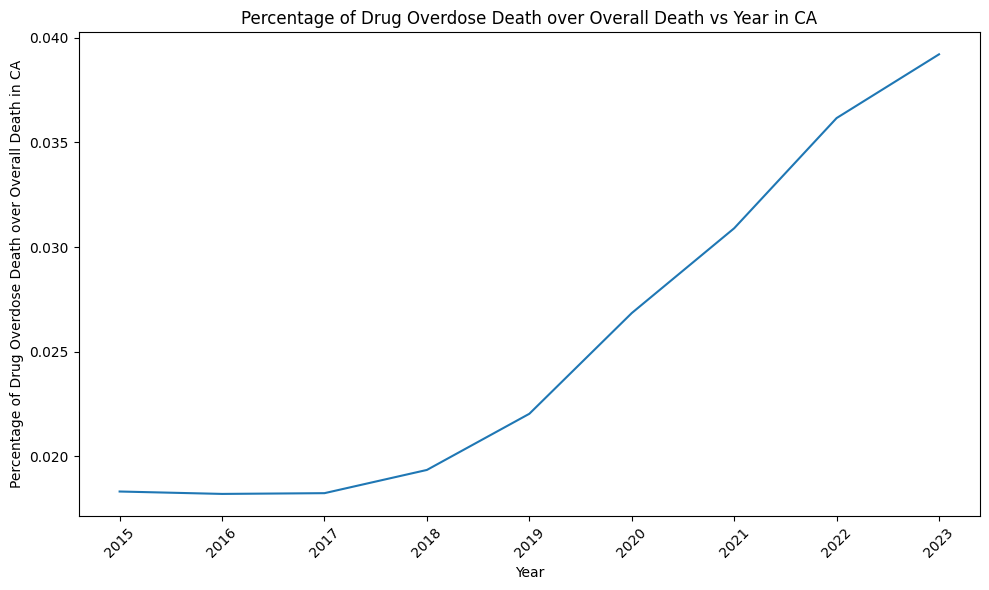

In [9]:
# curve plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(*zip(*sorted(percentage.items())))
plt.title('Percentage of Drug Overdose Death over Overall Death vs Year in CA')
plt.xlabel('Year')
plt.ylabel('Percentage of Drug Overdose Death over Overall Death in CA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


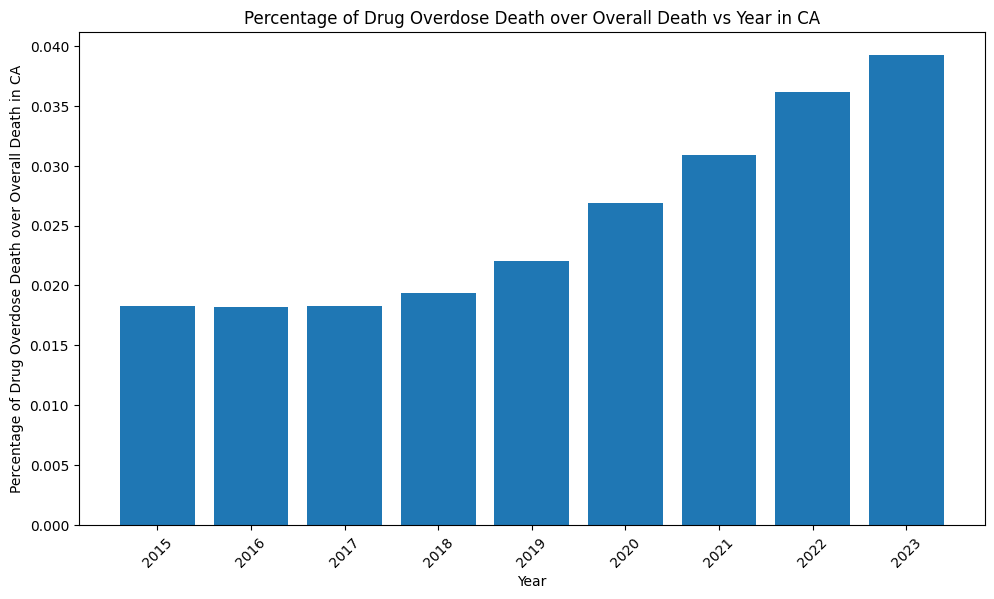

In [11]:
# bar plot
years = list(percentage.keys())
values = list(percentage.values())
plt.figure(figsize=(10, 6))
plt.title('Percentage of Drug Overdose Death over Overall Death vs Year in CA')
plt.xlabel('Year')
plt.ylabel('Percentage of Drug Overdose Death over Overall Death in CA')
plt.xticks(rotation=45)
plt.tight_layout()
plt.bar(range(len(percentage)), values, tick_label=years)
plt.show()